<a href="https://colab.research.google.com/github/rabiaozdemir/Transfer_Learning/blob/main/AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np
import os
import random
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Flatten
from keras.layers import MaxPooling2D,ZeroPadding2D, Conv2D
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils

In [2]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [3]:
train_path="./drive/MyDrive/chest_xray/train"
test_path="./drive/MyDrive/chest_xray/test"

trainDataGen=ImageDataGenerator(rescale=1./255, validation_split=0.1)
testDataGen=ImageDataGenerator(rescale=1./255)

trainGen=trainDataGen.flow_from_directory(
    train_path,
    target_size=(227,227),
    color_mode='rgb',
    class_mode="categorical",
    batch_size=128,
    subset="training"
    )

valGen=trainDataGen.flow_from_directory(
    train_path,
    target_size=(227,227),
    color_mode='rgb',
    class_mode="categorical",
    batch_size=128,
    subset="validation"
)

testGen=testDataGen.flow_from_directory(
    test_path,
    target_size=(227,227),
    color_mode='rgb',
    class_mode="categorical",
    batch_size=1
    )

Found 4711 images belonging to 3 classes.
Found 521 images belonging to 3 classes.
Found 624 images belonging to 3 classes.


In [4]:
alexnet=Sequential()
alexnet.add(Conv2D(96,kernel_size=(11,11),strides=(4,4),activation='relu',input_shape=(227,227,3)))
alexnet.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
alexnet.add(ZeroPadding2D((2,2)))
alexnet.add(Conv2D(256,kernel_size=(5,5),activation='relu',strides=(1,1)))
alexnet.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
alexnet.add(ZeroPadding2D((1,1)))
alexnet.add(Conv2D(384,kernel_size=(3,3),activation='relu',strides=(1,1)))
alexnet.add(ZeroPadding2D((1,1)))
alexnet.add(Conv2D(384,kernel_size=(3,3),activation='relu',strides=(1,1)))
alexnet.add(ZeroPadding2D((1,1)))
alexnet.add(Conv2D(256,kernel_size=(3,3),activation='relu',strides=(1,1)))
alexnet.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
alexnet.add(Flatten())
alexnet.add(Dense(32,activation='relu'))
alexnet.add(Dropout(0.1))
alexnet.add(Dense(3,activation='softmax'))
alexnet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 31, 31, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 15, 15, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 384)       8

In [5]:
alexnet.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [6]:
history=alexnet.fit(
 trainGen,
 steps_per_epoch=trainGen.samples//128,
 validation_data=valGen,
 validation_steps=valGen.samples//128,
 epochs=5

)

Epoch 1/5
36/36 [==============================] - 3175s 88s/step - loss: 1.2629 - accuracy: 0.4482 - val_loss: 1.0704 - val_accuracy: 0.4805
Epoch 2/5
36/36 [==============================] - 706s 20s/step - loss: 1.0706 - accuracy: 0.4766 - val_loss: 0.9168 - val_accuracy: 0.5957
Epoch 3/5
36/36 [==============================] - 693s 19s/step - loss: 0.9901 - accuracy: 0.5586 - val_loss: 0.8581 - val_accuracy: 0.6230
Epoch 4/5
36/36 [==============================] - 688s 19s/step - loss: 0.8612 - accuracy: 0.6080 - val_loss: 0.7571 - val_accuracy: 0.7188
Epoch 5/5
36/36 [==============================] - 672s 19s/step - loss: 0.7975 - accuracy: 0.6509 - val_loss: 0.7730 - val_accuracy: 0.6953


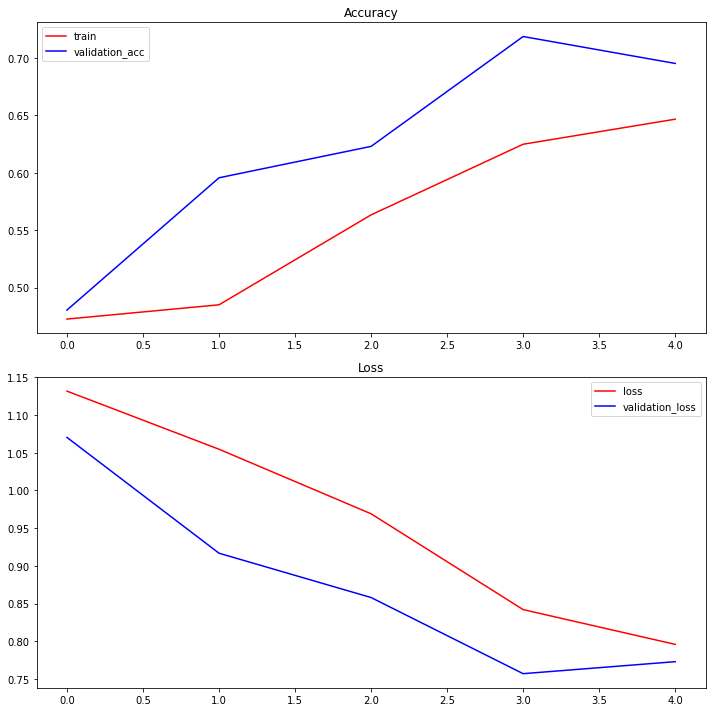

In [7]:
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.title("Accuracy")
plt.plot(history.history["accuracy"], color='r',label='train')
plt.plot(history.history["val_accuracy"], color='b',label='validation_acc')
plt.legend(loc='best')
plt.subplot(212)
plt.title("Loss")
plt.plot(history.history["loss"], color='r',label='loss')
plt.plot(history.history["val_loss"], color='b',label='validation_loss')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [9]:
 score=alexnet.evaluate(testGen)
print("Test Loss : ",score[0])
print("Test Accuracy % : ",score[1]*100)

624/624 [==============================] - 371s 595ms/step - loss: 0.7795 - accuracy: 0.7131
Test Loss :  0.7794553637504578
Test Accuracy % :  71.31410241127014


In [10]:
from sklearn.metrics import classification_report, confusion_matrix

In [11]:
y_pred=np.argmax(alexnet.predict(testGen), axis=1)

In [12]:
print('Confusion Matrix')
print(confusion_matrix(testGen.classes,y_pred))

print('Classification Report')
target_names=['bacteria_pneumonia', 'normal', 'virus_pneumonia']
print(classification_report(testGen.classes, y_pred, target_names=target_names))

Confusion Matrix
[[103  95  39]
 [100 102  32]
 [ 68  65  20]]
Classification Report
                    precision    recall  f1-score   support

bacteria_pneumonia       0.38      0.43      0.41       237
            normal       0.39      0.44      0.41       234
   virus_pneumonia       0.22      0.13      0.16       153

          accuracy                           0.36       624
         macro avg       0.33      0.33      0.33       624
      weighted avg       0.34      0.36      0.35       624

